# 📘 Notes on **Expected Value (Mean)**
[Based on Steve Brunton’s Probability Bootcamp video](https://www.youtube.com/watch?v=CBgCR1kHSUI&list=PLMrJAkhIeNNR3sNYvfgiKgcStwuPSts9V&index=28)

## 🎯 What Expected Value Represents
- The **expected value** $E[X]$ (also called the *expectation value* or *mean*) is the **center of mass** of a probability distribution.
- Intuitively: If you repeatedly sample from a distribution, the **average** of those samples will tend toward the expected value.
- It is **not always** the most likely value — that’s the **mode**.

---

# 🧮 How to Compute Expected Value

## 1. **Discrete Random Variables**  
For a variable $X$ taking values $x_k$:

$$
E[X] = \sum_k x_k \cdot P(X = x_k)
$$

- This is a **weighted average** of all possible values, weighted by their probabilities.
- Example: Number of heads in 100 fair coin flips  
  - Values: $0,1,2,\dots,100$  
  - Probabilities follow a **binomial distribution**  
  - Expected value ≈ 50

---

## 2. **Continuous Random Variables**

$$
E[X] = \int_{-\infty}^{\infty} x \, f(x)\, dx
$$

- Same idea: a weighted average, but using the **probability density function** $f(x)$.

---

# 🔁 Expected Value and the Law of Large Numbers
If you take $n$ independent samples $X_1, X_2, \dots, X_n$, the **sample mean**:

$$
\bar{X} = \frac{1}{n}\sum_{j=1}^n X_j
$$

will **converge** to the true expected value as $n \to \infty$.

This is the **Law of Large Numbers**:
- More samples → sample mean gets closer to $E[X]$
- Variance of the sample mean shrinks as $n$ grows

---

# 🎨 Why Expected Value Can Be Misleading
Expected value is **not**:
- The most likely value (that’s the **mode**)  
- The middle value (that’s the **median**)  

Brunton shows two distributions with the **same expected value**:
- A Gaussian (bell curve)
- A bimodal distribution with two peaks and **zero probability** at the expected value

This demonstrates:
- Expected value alone does **not** describe the shape of a distribution.
- You need **variance** and **higher moments** to fully characterize it.

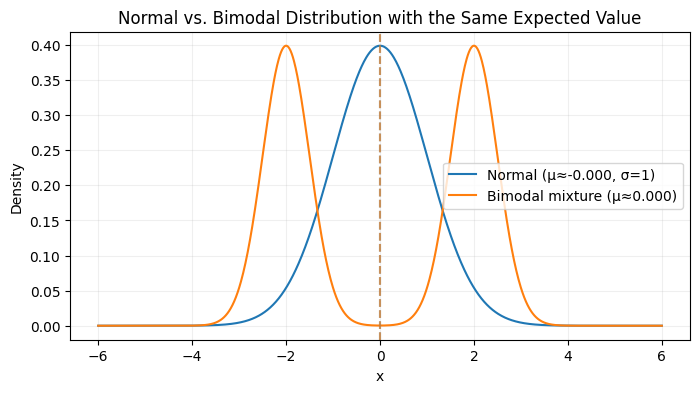

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import integrate

# Grid
x = np.linspace(-6, 6, 1000)

# Normal distribution (mean 0, sd 1)
normal_pdf = norm.pdf(x, loc=0, scale=1)

# Bimodal mixture with same mean (symmetric around 0)
w1, w2 = 0.5, 0.5
mu1, mu2 = -2.0, 2.0
sigma1, sigma2 = 0.5, 0.5
bimodal_pdf = w1 * norm.pdf(x, loc=mu1, scale=sigma1) + w2 * norm.pdf(x, loc=mu2, scale=sigma2)

# Numerical means (should be equal)
mean_normal = integrate.trapezoid(x * normal_pdf, x)
mean_bimodal = integrate.trapezoid(x * bimodal_pdf, x)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x, normal_pdf, label=f'Normal (μ≈{mean_normal:.3f}, σ=1)', color='C0')
plt.plot(x, bimodal_pdf, label=f'Bimodal mixture (μ≈{mean_bimodal:.3f})', color='C1')
plt.axvline(mean_normal, color='C0', linestyle='--', alpha=0.6)
plt.axvline(mean_bimodal, color='C1', linestyle='--', alpha=0.6)
plt.title('Normal vs. Bimodal Distribution with the Same Expected Value')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

---

# 🧩 Moments of a Distribution
Expected value is the **first moment**.

Other moments:
- **Second moment** → variance / standard deviation  
- **Third, fourth, …** → skewness, kurtosis, etc.  
- Together, moments act like a **fingerprint** for the distribution.

---

# 🛡️ Median vs. Mean (Robustness)
Expected value is **sensitive to outliers**.

Example from the video:
- U.S. household wealth distribution  
- **Median** ≈ \$200k  
- **Mean** ≈ \$1,000,000  
- A few extremely wealthy individuals pull the mean upward by a factor of ~5

Median is **robust**; mean is not.

---

# 🧭 Key Definitions

| Concept | Meaning |
|--------|---------|
| **Mean / Expected Value** | Weighted average of all values |
| **Mode** | Most likely value (peak of PDF) |
| **Median** | Middle value where CDF = 0.5 |

---

# 📝 Summary
Expected value:
- Is the **center of mass** of a distribution  
- Is easy to compute  
- Converges to the sample mean with many samples  
- Can be **misleading** for skewed or multimodal distributions  
- Needs variance and higher moments to fully describe a distribution